In [1]:
# 라이브러리 설정
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
# Initializing mediapipe pose class.
# mediapipe pose class를 초기화 한다.
mp_pose = mp.solutions.pose
 
# Setting up the Pose function.
# pose detect function에 image detect=True, 최소감지신뢰도 = 0.3, 모델 복잡도 =2를 준다.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
 
# Initializing mediapipe drawing class, useful for annotation.
# mediapipe의 drawing class를 초기화한다.
mp_drawing = mp.solutions.drawing_utils

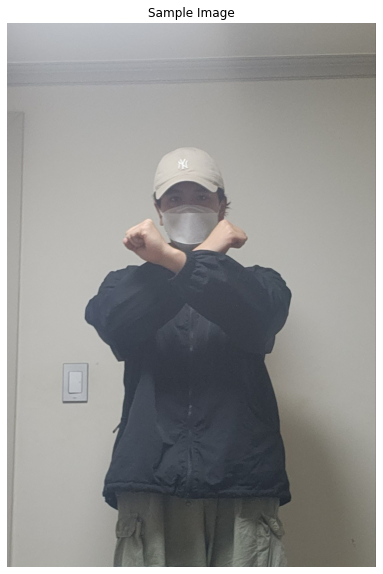

In [3]:
# 이미지 읽어오기
# 샘플 이미지를 cv2.imread()로 읽어온다
# Read an image from the specified path.
sample_img = cv2.imread('./Pose_test/x_pose.jpg')
 
# Specify a size of the figure.
plt.figure(figsize = [10, 10])
 
# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [4]:
# pose detect 수행
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
 
# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(32):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.4933474063873291
y: 0.3786943554878235
z: -0.16930191218852997
visibility: 0.9975591897964478

LEFT_EYE_INNER:
x: 0.5158747434616089
y: 0.3573454022407532
z: -0.14402815699577332
visibility: 0.9943917393684387

LEFT_EYE:
x: 0.529634416103363
y: 0.35938122868537903
z: -0.1446852684020996
visibility: 0.9934383034706116

LEFT_EYE_OUTER:
x: 0.5418404340744019
y: 0.3611075282096863
z: -0.1448228359222412
visibility: 0.9957039952278137

RIGHT_EYE_INNER:
x: 0.4717774987220764
y: 0.3541526198387146
z: -0.13487419486045837
visibility: 0.9963675737380981

RIGHT_EYE:
x: 0.45562946796417236
y: 0.35475385189056396
z: -0.13570348918437958
visibility: 0.9964742064476013

RIGHT_EYE_OUTER:
x: 0.44117847084999084
y: 0.35637930035591125
z: -0.13627277314662933
visibility: 0.997647225856781

LEFT_EAR:
x: 0.5618782639503479
y: 0.3700252175331116
z: 0.022092338651418686
visibility: 0.9979909658432007

RIGHT_EAR:
x: 0.43338605761528015
y: 0.36920225620269775
z: 0.0638892874121666
visibility: 0.995

In [5]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape
 
# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(32):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 476.0802471637726
y: 538.8820678591728
z: -163.37634526193142
visibility: 0.9975591897964478

LEFT_EYE_INNER:
x: 497.8191274404526
y: 508.50250738859177
z: -138.98717150092125
visibility: 0.9943917393684387

LEFT_EYE:
x: 511.09721153974533
y: 511.39948841929436
z: -139.62128400802612
visibility: 0.9934383034706116

LEFT_EYE_OUTER:
x: 522.8760188817978
y: 513.8560126423836
z: -139.75403666496277
visibility: 0.9957039952278137

RIGHT_EYE_INNER:
x: 455.26528626680374
y: 503.9591780304909
z: -130.15359804034233
visibility: 0.9963675737380981

RIGHT_EYE:
x: 439.68243658542633
y: 504.8147312402725
z: -130.9538670629263
visibility: 0.9964742064476013

RIGHT_EYE_OUTER:
x: 425.73722437024117
y: 507.1277444064617
z: -131.5032260864973
visibility: 0.997647225856781

LEFT_EAR:
x: 542.2125247120857
y: 526.5458845496178
z: 21.319106798619032
visibility: 0.9979909658432007

RIGHT_EAR:
x: 418.21754559874535
y: 525.3748105764389
z: 61.653162352740765
visibility: 0.9952934384346008

MOUTH_LEFT:

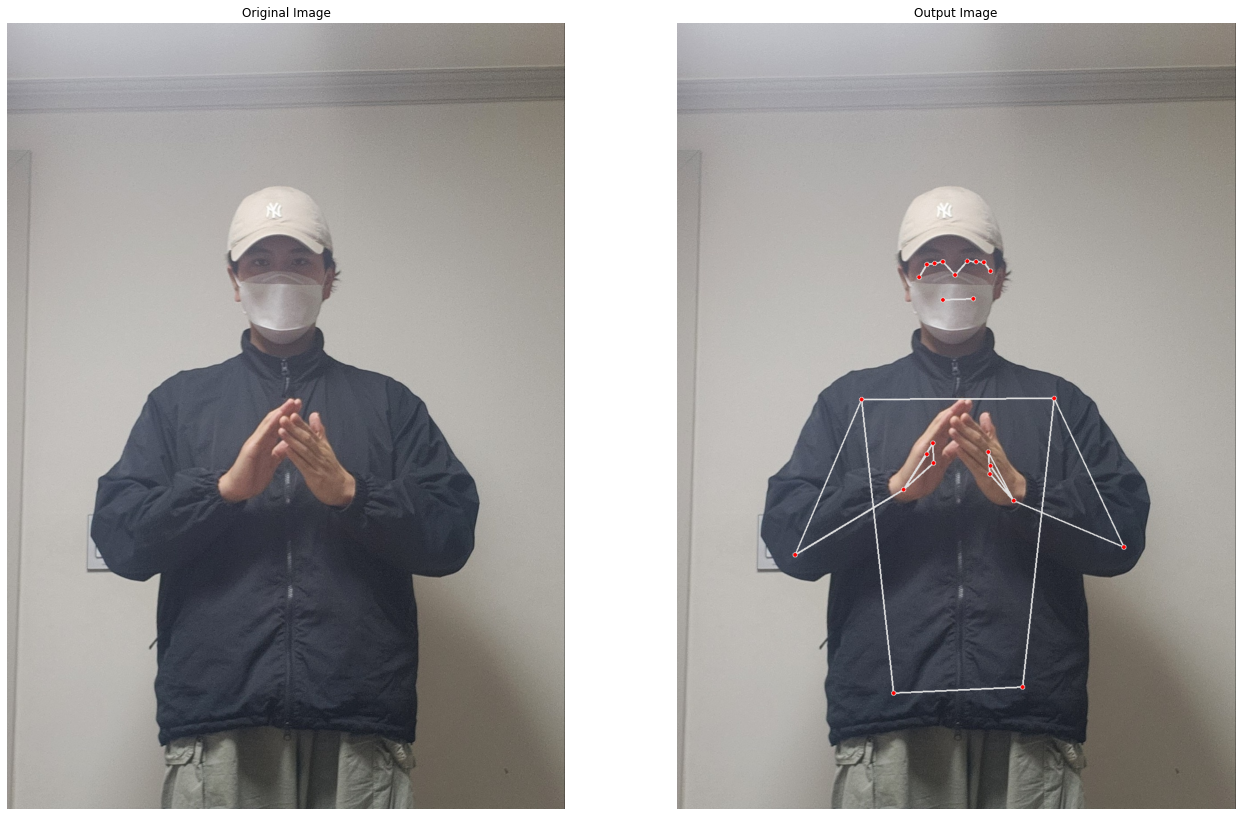

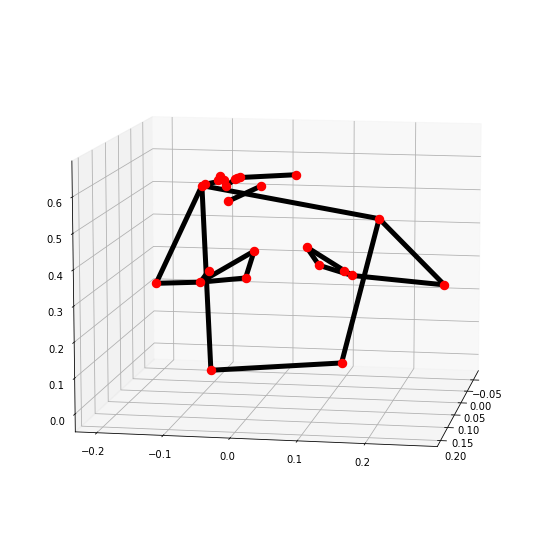

In [93]:
def detectPose(image, pose, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    # 예시이미지 copy하기
    output_image = image.copy()

    # 컬러 이미지 BGR TO RGB 변환
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # pose detection 수행
    results = pose.process(imageRGB)

    # input image의 너비&높이 탐색
    height, width, _ = image.shape

    # detection landmarks를 저장할 빈 list 초기화
    landmarks = []

    # landmark가 감지 되었는지 확인
    if results.pose_landmarks:

      # landmark 그리기
      mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

      # 감지된 landmark 반복
      for landmark in results.pose_landmarks.landmark:

        # landmark를 list에 추가하기
        landmarks.append((int(landmark.x * width), int(landmark.y * height), (landmark.z * width)))

    # 오리지널 image와 pose detect된 image 비교
    if display:

      # 오리지널 & 아웃풋 이미지 그리기
      plt.figure(figsize=[22,22])
      plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
      plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

      # 3D 랜드마크 나타내기
      mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    # 그렇지 않다면, output_image 와 landmark return한다
    else:

      return output_image, landmarks
# pose detection function start

image = cv2.imread('./Pose_test/clap_pose.jpg')
detectPose(image, pose, display=True)

In [94]:
# 앵글 계산 함수
def calculateAngle(landmark1, landmark2, landmark3):

    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
        
    # Return the calculated angle.
    return angle



In [95]:
def calculate_distance(point1, point2):
    distance = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2 + (point1[2] - point2[2])**2)
    return distance


In [96]:
output_image, landmarks = detectPose(image, pose, display=False)

Right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
Right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]
Right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
Right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]

Left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
Left_elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]
Left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
Left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]


print(f"오른쪽 팔꿈치: {calculateAngle(Right_shoulder, Right_elbow,Right_wrist ):.2f}")
print(f"왼쪽 팔꿈치:{calculateAngle(Left_wrist,Left_elbow,Left_shoulder):2f}")
print(f"오른쪽 어깨: {calculateAngle(Right_hip,Right_shoulder,Right_elbow):.2f}")
print(f"왼쪽 어깨: {calculateAngle(Left_elbow, Left_shoulder, Left_hip):.2f}")

distance = calculate_distance(Left_wrist, Right_wrist)
print(f"Distance between Left_wrist and Right_wrist: {distance}")


오른쪽 팔꿈치: 35.83
왼쪽 팔꿈치:42.016417
오른쪽 어깨: 29.36
왼쪽 어깨: 31.33
Distance between Left_wrist and Right_wrist: 200.42442498112936


In [83]:
# 분류 함수

def classifyPose(landmarks, output_image, display=False):
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # 박수 치는 값 계산
    left_wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    
    # 11번, 13번, 15번 landmark 
    # 왼쪽 어깨, 왼쪽 팔꿈치, 왼쪽 손목 landmark angle 값 계산 
    
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value])
    
    # 12번, 14번, 16번 landmark 
    # 오른쪽 어깨, 오른쪽 팔꿈치, 오른쪽 손목 landmark angle 값 계산 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    # 13번, 15번, 23번 landmark 
    # 왼쪽 어깨, 왼쪽 팔꿈치, 왼쪽 엉덩이, landmark angle 값 계산 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    # 12번, 14번, 24번 landmark 
    # 오른쪽 어깨, 오른쪽 팔꿈치, 오른쪽 엉덩이 landmark angle 값 계산  
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    #----------------------------------------------------------------------------------------------------------------
    
    # 전사포즈 vs T포즈 비교
    # 두 포즈 모두 양팔을 곧게 펴고 어깨를 일정한 각도로 유지한다.
    # 전사 포즈는 다리를 벌리지만, T포즈는 다리를 일자리 쭉 펴고 있다는 점 이 다르다
        
    # 양팔을 모두 곧게 펴고 있는지 체크한다
    # 왼쪽, 오른쪽 팔, 어깨, 팔꿈치의 각도가 165 ~ 195도 사이에 위치하는지 확인한다.
    if right_elbow_angle > 165 and right_elbow_angle < 195:
        if right_shoulder_angle >80 and right_shoulder_angle < 110:
            label = 'righthand_pose'
        if right_shoulder_angle > 125 and right_shoulder_angle < 140:
            label = 'righthand_up'
    
    if left_elbow_angle > 165 and left_elbow_angle < 195:
        if left_shoulder_angle > 80 and left_shoulder_angle<110 : 
            label = 'lefthand_pose'
        if left_shoulder_angle > 125 and left_shoulder_angle< 140 :
            label = 'lefthand_up'
    
    if right_elbow_angle > 30 and right_elbow_angle < 60 and left_elbow_angle > 30 and left_elbow_angle < 60 :
        if right_shoulder_angle> 5 and right_shoulder_angle < 20 and left_shoulder_angle > 5 and left_shoulder_angle < 20 :
            label = 'X_pose'
        if right_elbow_angle > 30 and right_elbow_angle< 50 and left_elbow_angle > 30 and left_elbow_angle< 50:
            label = 'Clap_hands'
    
    
                    
        
     #----------------------------------------------------------------------------------------------------------------
    
    # 포즈 분류가 잘 되었는지 확인
    if label != 'Unknown Pose':
        
        color = (0, 255, 0)  
    
    # 분류되지 않은 자세라면 Unkwown Pose로 왼쪽 상단에 연두색으로 text 입력
    cv2.putText(output_image, label, (10, 100),cv2.FONT_HERSHEY_PLAIN, 7, color, 7)
    
    # 결과 이미지 보여주기 Check if the resultant image is specified to be displayed.
    if display:
    
        # 결과 이미지를 BGR TO RGB로 matplotlib을 이용해 꺼내준다.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        # 결과 이미지랑 표시될 label을 return 한다
        return output_image, label

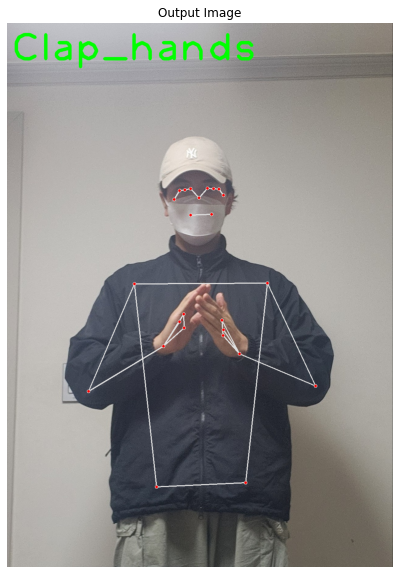

In [84]:
image = cv2.imread('./Pose_test/clap_pose.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)